# Decision Trees
CMP5101 notes (Tevfik Aytekin)


### Generate synthetic data

[[-1.58323426 -1.54052331]
 [-1.1097369  -0.60646187]
 [-0.81428024 -0.8335722 ]
 [ 0.32787075  0.9284999 ]
 [-1.9166138   1.2290981 ]
 [-0.12468314  0.83741207]
 [-1.54523466  0.28418576]
 [-0.9293784   0.3892048 ]
 [ 0.82061295  2.16692072]
 [ 0.20990736 -1.1410968 ]]
[0 0 0 0 0 1 1 1 1 1]


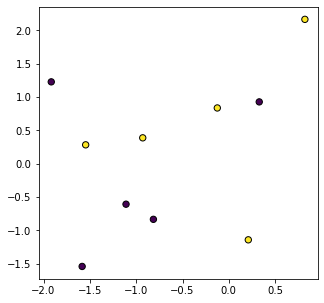

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler



X, y = make_classification(n_samples = 10,n_features=2, n_redundant=0, n_informative=1, class_sep=0.2,
                             n_clusters_per_class=1)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='k');
print(X)
print(y)

### make_classification
[Python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

### Decision Tree Classification

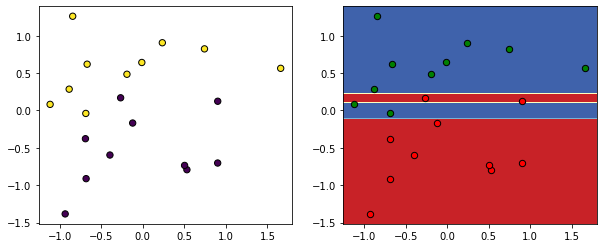

In [2]:
# Play with class_sep and observe the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples = 20, n_features=2, n_redundant=0, n_informative=1, class_sep=0.5,
                             n_clusters_per_class=1, random_state=1)

fig, ax = plt.subplots(1,2,figsize=(10,4));

ax[0].scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_step = 0.02
n_classes = 2
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    ax[1].scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

### Draw Decision Tree

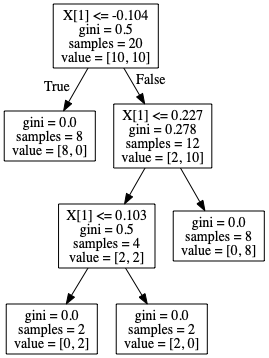

In [3]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Multiclass Classification

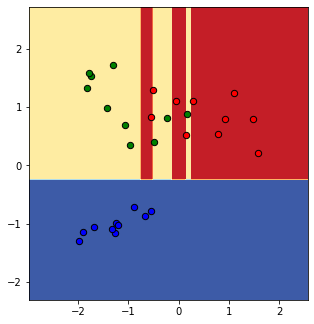

In [4]:
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.9,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

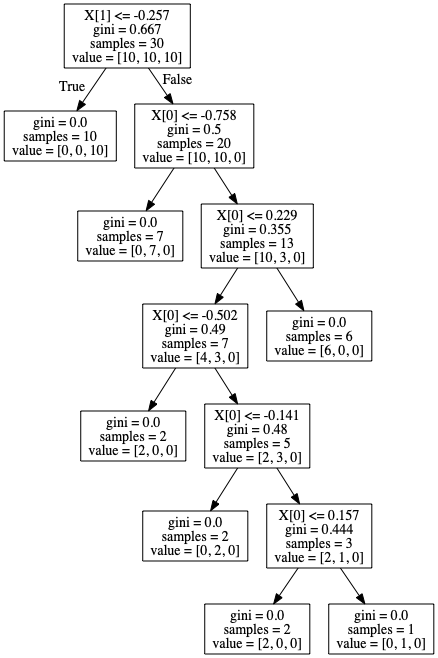

In [5]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Overfitting

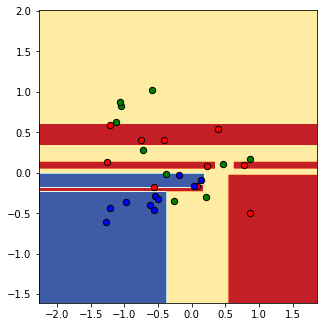

In [6]:
# Note that class_sep=0.2
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.2,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

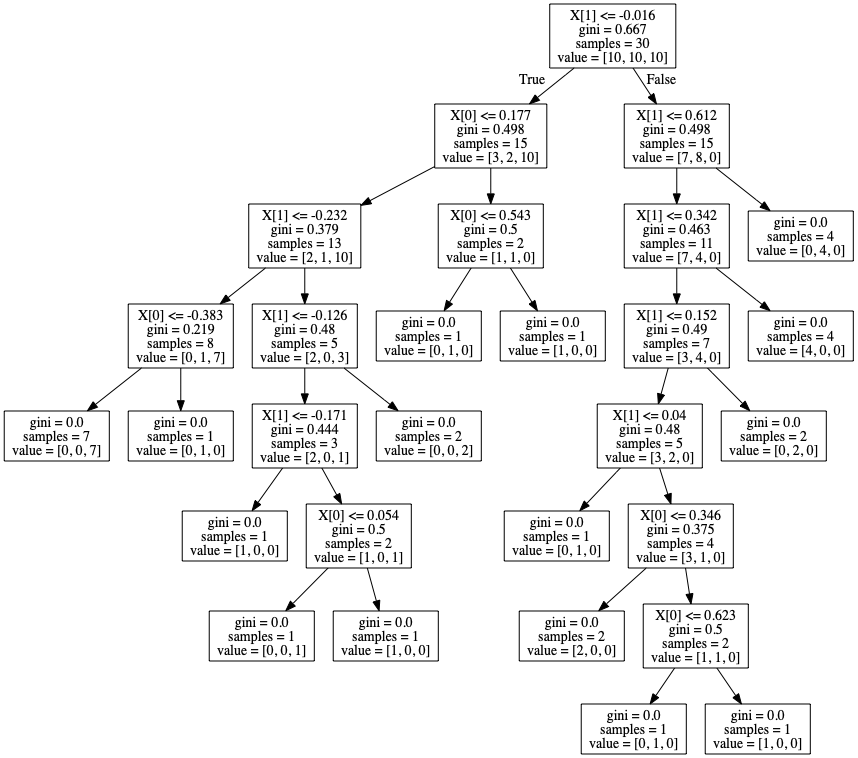

In [7]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### min_samples_split
The minimum number of samples required to split an internal node, we can use it to prevent splitting nodes with few instances. This often helps overfitting.

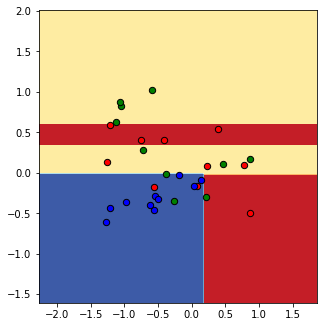

In [8]:
# you can play with the min_samples_split parameter.
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier(min_samples_split=10)
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)



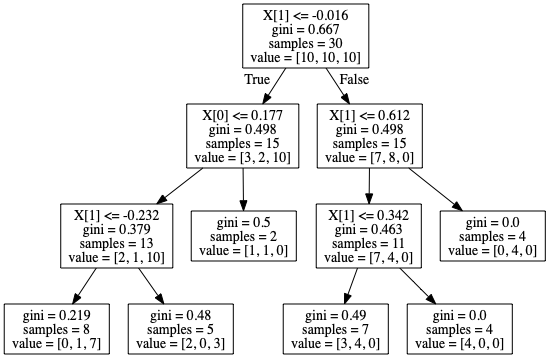

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Decision Tree Regression

Decision trees can also be used for regression. Much of the algorithm is similar to building classification trees. The key difference is, the value which minimizes the following sum of squared error is chosen as the splitting point. In other words the split point is where the reduction in variance is maximum.

$$SSE=\sum_{i \in R_1}(y_i - \bar y_1)^2+\sum_{i \in R_2}(y_i - \bar y_2)^2$$

where $\bar y_1$ and $\bar y_2$ are the mean values in regions $R_1$ and $R_2$.

(12, 1) (12,)
(2, 1) (2,)


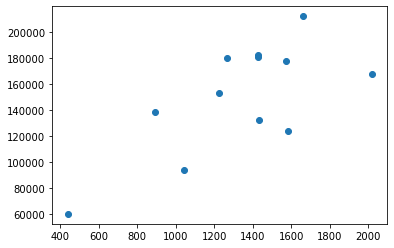

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("../datasets/house_prices/train.csv")
test = pd.read_csv("../datasets/house_prices/test.csv")
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train2 = train2.sample(frac=0.01)
X = train2[['GrLivArea']]
y = train2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

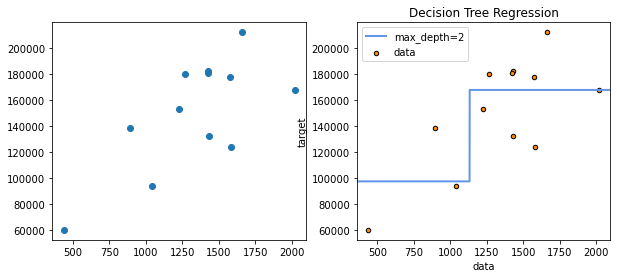

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth

regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 3000.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)


fig, ax = plt.subplots(1,2,figsize=(10,4));

# Plot the results
ax[0].scatter(X_train, y_train)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
ax[1].scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
ax[1].plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()







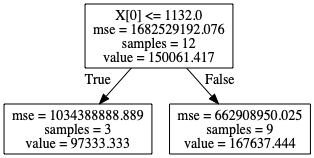

In [12]:
dot_data = tree.export_graphviz(regr_1, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Decision Tree vs. Linear Regression

<img src="images/ubend.jpeg" style="max-width:100%; width: 30%">
[image source](https://https://www.economist.com/christmas-specials/2010/12/16/the-u-bend-of-life)

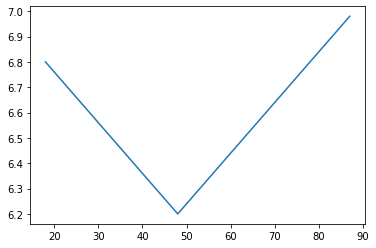

In [13]:
age = np.arange(18, 88)
h1 = np.arange(6.8, 6.2, -0.02)
h2 = np.arange(6.2, 7, 0.02)
h = h1.tolist()+h2.tolist()
plt.plot(age,h)

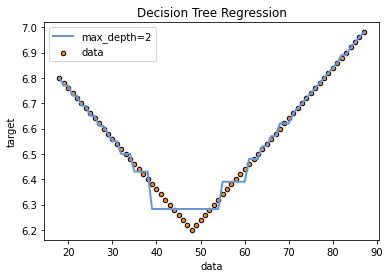

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression tree
regr_1 = DecisionTreeRegressor(max_depth=5)
#play with max_depth
age = age.reshape(age.size,1)
regr_1.fit(age, h)

# Predict
X_test = np.arange(18, 88.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

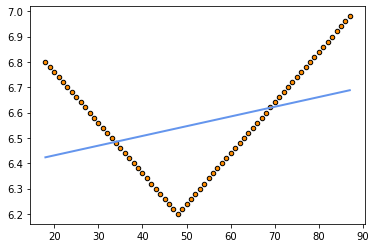

In [15]:
# fit a linear model
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(age, h)
y_1 = model.predict(X_test)
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)

You can play with the following data to better understand how split points are chosen in order to reduce variance.

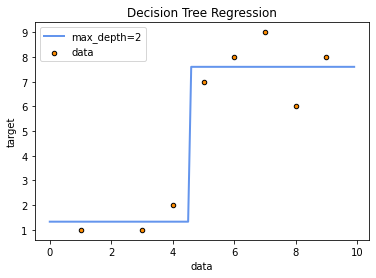

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X = np.array([1,2,3,4,5,6,7,8,9]);
X = X.reshape(-1,1)
y = [1,3,1,2,7,8,9,6,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth
regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0, 10, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Test MAE: 30872.763633734416
Test Kaggle-Score: 0.23272851221384436
Test MAPE: 19.079770832224266
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


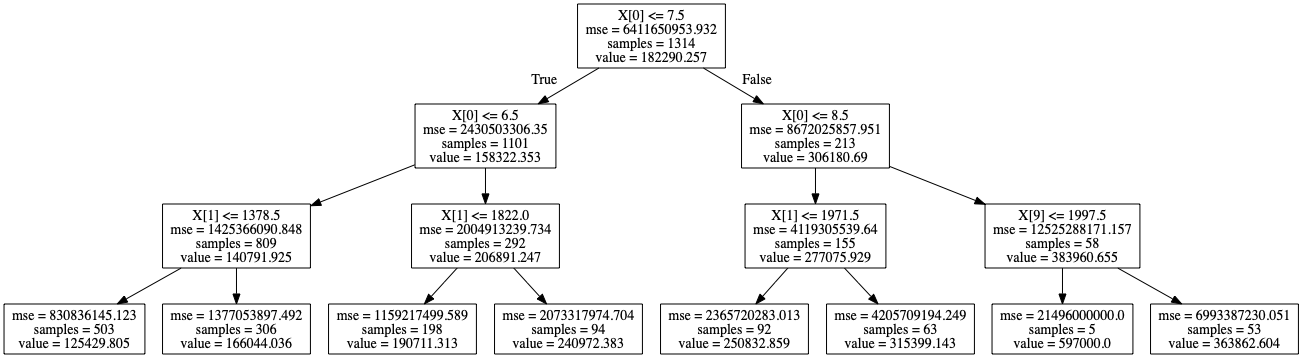

In [17]:
# Run Regression Tree with top correlated 10 attributes with SalePrice
from sklearn.metrics import mean_squared_log_error
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())


    regr = DecisionTreeRegressor(max_depth=3)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

print(top10)

dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [18]:
model.feature_importances_

array([0.85822466, 0.10172397, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04005136])

Test MAE: 29914.951939025777
Test Kaggle-Score: 0.234679481718197
Test MAPE: 18.935548123818606


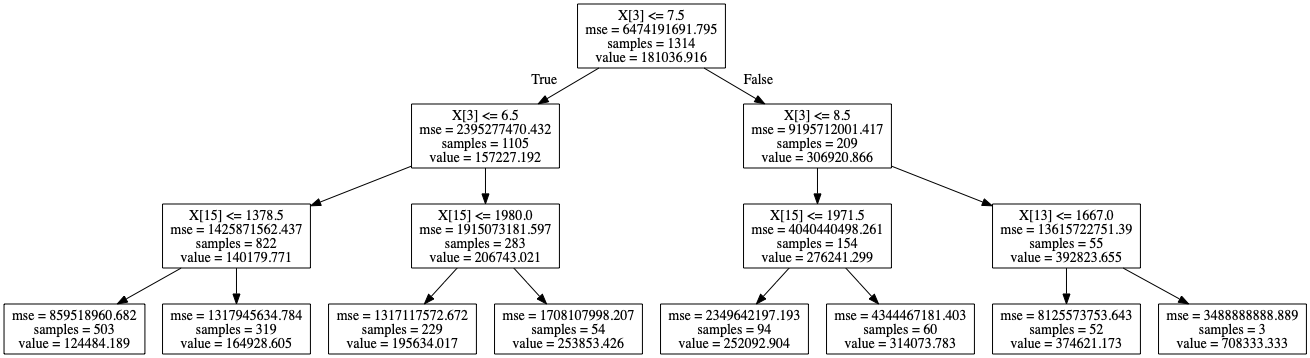

In [19]:
# run Regression Tree with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    regr = DecisionTreeRegressor(max_depth=3)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))


dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [99]:
# Most important attributes
cols = X.columns
print(cols[3])
print(cols[15])
print(cols[13])

OverallQual
GrLivArea
2ndFlrSF
